# 2.3.2 k-최근접 이웃 (k-NN)

In [1]:
# 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf").get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<br>

**$k$-NN($k$-Nearest Neighbors) 알고리즘**

- 가장 간단한 머신러닝 알고리즘
- 모델을 만드는 과정 : 단순히 훈련 데이터셋을 그냥 저장하는 것
- 새로운 데이터 포인트에 대해 예측 시 알고리즘이 훈련 데이터셋에 가장 가까운 데이터 포인트, 즉 **'최근접 이웃'**을 찾는다.

<br>

## 1) k-최근접 이웃 분류

- 가장 간단한 $k$-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용
- 단순히 이 훈련 데이터 포인트의 출력이 예측이 됨

<br>

### (1) 1-NN

- **[그림 2-4]**은 forge 데이터셋을 분류한 것

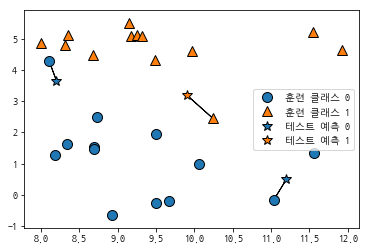

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

<div style="text-align:left">
    <b>[그림 2-4]</b> forge 데이터셋에 대한 1-최근접 이웃 모델의 예측
</div>

- 위 그림에는 데이터 포인트 3개를 추가함 (별 모양으로 표시)
- 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결
- 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 됨 (같은 색으로 연결)

<br>

### (2) $k$-NN

- 가장 가까운 이웃은 하나가 아닌 **임의의 $k$개** 선택 가능
- 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 실시
- 즉, 테스트 포인트 하나에 대해 클래스 0에 속한 이웃이 몇 개인지, 클래스 1에 속한 이웃이 몇 개인 지를 셈
- 이웃이 더 많은 클래스를 레이블로 지정  
  $\rightarrow$ *$k$-최근접 이웃 중 다수의 클래스가 레이블이 된다.*

<br>

- **[그림 2-5]**는 세 개의 최근접 이웃을 사용하는 예

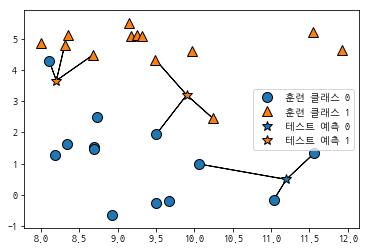

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

<div style="text-align:left">
    <b>[그림 2-5]</b> forge 데이터셋에 대한 3-최근접 이웃 모델의 예측
</div>

- 예측은 연결된 데이터 포인트의 색으로 나타남
- 새 데이터 포인트 중 왼쪽 위의 것은 이웃을 하나만 사용했을 떄와 예측 결과가 달라짐

<br>

### (3) 다수의 클래스

- 클래스가 다수인 데이터셋에도 같은 방법 적용 가능 
- 클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용

<br>

### (4) scikit-learn 사용

- scikit-learn을 사용해 $k$-최근접 이웃 알고리즘을 어떻게 적용하는 지 확인

<br>

**a) 데이터 분리**

- 일반화 성능 평가를 위해 데이터를 훈련 세트와 테스트 세트로 나눔

In [5]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<br>

**b) 모델 객체 생성**

- `KNeighborsClassifier`를 임포트(import)하고 객체를 만듬
- 이웃의 수 같은 **매개변수**들을 지정 (이웃의 수 = 3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

<br>

**c) `fit` 메서드 이용 모델 학습**

- 훈련 세트를 사용해 분류 모델을 학습시킴
- `KNeighborsClassifier`에서의 학습 : 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

<br>

**d) `predict` 메서드 이용 예측**

- 테스트 데이터에 대해 `predict` 메서드를 호출해서 예측 실시
- 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 $\rightarrow$ 가장 많은 클래스를 찾음

In [8]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


<br>

**e) `score` 메서드 이용 모델 평가**

- 모델이 얼마나 잘 일반화되었는 지 평가하기 위해 `score` 메서드에 테스트 데이터(`X_test`)와 테스트 레이블(`y_test`)을 넣어 호출

In [9]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


- 모델의 정확도는 **86%** (모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측)

<br>

## 2) KNeighborsClassifier 분석

<br>

### (1) 결정 경계 (decision boundary)

- forge 데이터셋은 2차원 데이터셋 $\rightarrow$ 가능한 모든 테스트 포인트의 예측을 xy평면에 그려볼 수 있음
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함
- 이렇게 하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역이 나뉘는 **결정 경계(decision boundary)**를 볼 수 있음

<br>

- 이웃이 하나(`n_neighbors=1`), 셋(`n_neighbors=3`), 아홉(`n_neighbors=9`)개일 때의 결정 경계 확인

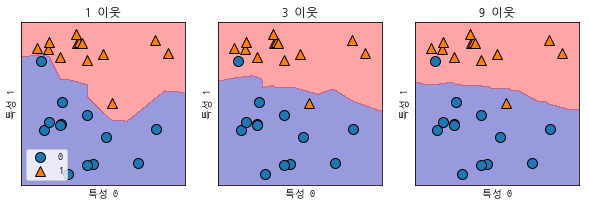

In [10]:
fig, axes = plt.subplots(1,3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes) :
    
    # fit 메서드는 self 객체를 반환
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

<div style="text-align:left">
    <b>[그림 2-6]</b> n_neighbors 값이 각기 다른 최근접 이웃 모델이 만든 결정 경계
</div>

<br>

- 이웃을 하나 선택했을 때(**[그림 2-6]**의 왼쪽 그림)는 결정 경계가 훈련 데이터에 가깝게 따라감
- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
- 부드러운 경계 = 단순한 모델

- 이웃을 **적게** 사용 $\rightarrow$ 모델의 복잡도가 높아짐 (**[그림 2-1]**의 오른쪽)
- 이웃을 **많이** 사용 $\rightarrow$ 모델의 복잡도가 낮아짐 (**[그림 2-1]**의 왼쪽)
- 훈련 데이터 전체 개수를 이웃의 수로 지정  
$\rightarrow$ 모든 테스트 포인트가 같은 이웃(모든 훈련 데이터)을 가짐  
$\rightarrow$ 테스트 포인트에 대한 예측은 모두 같은 값이 됨  
(즉, 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨)

<br>

### (2) 모델의 복잡도와 일반화 사이의 관계

- 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는 지 확인

- 실제 데이터인 유방암 데이터셋 사용
- 훈련 세트와 테스트 세트로 나눔
- 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능 평가

In [11]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

In [12]:
for n_neighbors in neighbors_settings :
    
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))    

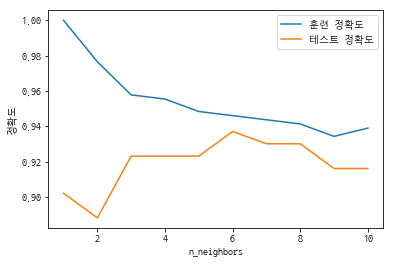

In [13]:
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

<div style="text-align:left">
    <b>[그림 2-7]</b> n_neighbors 변화에 따른 훈련 정확도와 테스트 정확도
</div>

- `n_neighbors` 수(x축)에 따른 훈련 세트와 테스트 세트 정확도(y축)을 보여줌
- 실제 이런 그래프는 매끈하게 나오지 않지만, 여기서도 **과대적합**과 **과소적합**의 **특징**을 볼 수 있음  
(이웃의 수가 적을수록 모델이 복잡 $\rightarrow$ **[그림 2-1]**의 그래프가 수평으로 뒤집힌 형태)

- 최근접 이웃의 수가 하나일 때 훈련 데이터에 대한 예측이 완벽
- 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듬
- 이웃을 하나 사용했을 때의 정확도는 이웃을 많이 사용했을 때보다 낮음  
  
  
$\quad \Rightarrow$ 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명!

- 이웃을 10개 사용했을 때는 모델이 너무 단순해져서 정확도가 나빠짐

- 정확도가 가장 좋을 때는 중간 정도인 6개를 사용한 경우

<br>

## 3) k-최근접 이웃 회귀

- $k$-최근접 이웃 알고리즘은 **회귀 분석**에도 쓰임
- `wave` 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용
- x축 : 3개의 테스트 데이터를 흐린 별 모양으로 표시
- y축 : 최근접 이웃을 한 개만 이용할 때의 예측 (그냥 가장 가까운 이웃의 타깃값)
- 이 예측은 **[그림 2-8]**에 진한 별 모양으로 표시

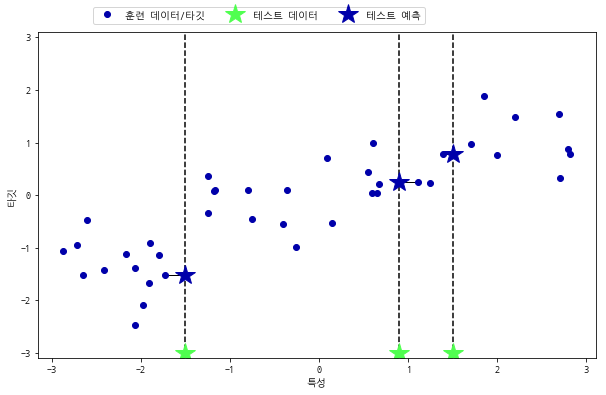

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

<div style="text-align:left">
    <b>[그림 2-8]</b> wave 데이터셋에 대한 1-최근접 이웃 회귀 모델의 예측
</div>